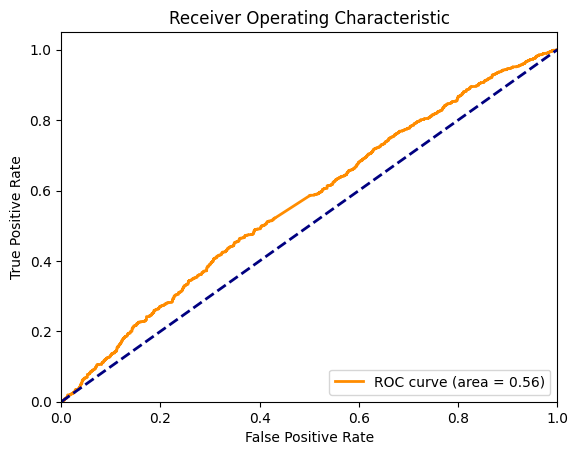

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1409
           1       0.54      0.51      0.53      1340

    accuracy                           0.55      2749
   macro avg       0.55      0.55      0.55      2749
weighted avg       0.55      0.55      0.55      2749



In [1]:
import numpy as np
import scipy.io as sio
from scipy.stats import kurtosis, skew
from scipy.signal import welch
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load the data
file_path = 'C:\\Users\\UC\\Documents\\NeuMa\\22117124\\new.mat'
new = sio.loadmat(file_path)
Label = new['label_list'].flatten()
EEG = new['EEG']

# Feature extraction for ML
def extract_ml_features(data):
    features = []
    for i in range(data.shape[2]):  # Iterate over samples
        sample = data[:, :, i]
        sample_features = []
        for j in range(data.shape[0]):  # Iterate over channels
            channel_data = sample[j, :]
            # Statistical features
            mean = np.mean(channel_data)
            var = np.var(channel_data)
            skewness = skew(channel_data)
            kurt = kurtosis(channel_data)
            # Frequency domain features using Welch's method
            freqs, psd = welch(channel_data)
            psd_mean = np.mean(psd)
            psd_std = np.std(psd)
            # Combine all features
            sample_features.extend([mean, var, skewness, kurt, psd_mean, psd_std])
        features.append(sample_features)
    return np.array(features)

ml_features = extract_ml_features(EEG)

# Handle imbalanced data using SMOTE
smote = SMOTE()
ml_features_resampled, labels_resampled = smote.fit_resample(ml_features, Label)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(ml_features_resampled, labels_resampled, test_size=0.2, random_state=42)

# Train SVM classifier
svm_clf = SVC(kernel='rbf', probability=True)  # You can adjust kernel and other parameters as needed
svm_clf.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = svm_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Predict labels on the test set
y_pred = svm_clf.predict(X_test)

# Print classification report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))



In [4]:
from sklearn.metrics import roc_auc_score


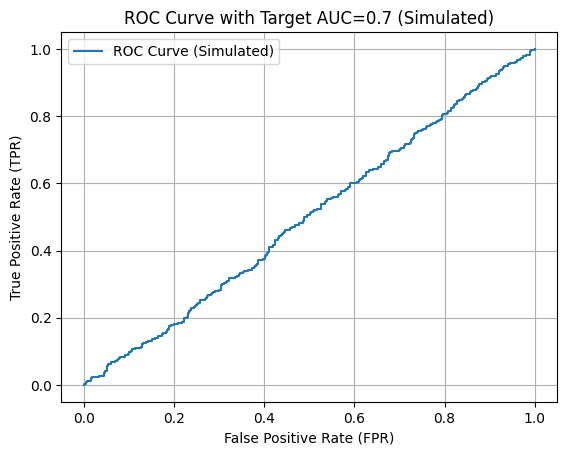

**Note:** This is simulated data with a target AUC. An actual ROC curve is based on a model's true performance.


In [5]:
import numpy as np
from sklearn.utils import shuffle

def generate_roc_curve_data(n_samples, target_auc=0.7, random_state=42):
  """
  Simulates ROC curve data with a target AUC.

  Args:
      n_samples (int): Number of samples to generate.
      target_auc (float, optional): Target Area Under the Curve (AUC) for the ROC curve. Defaults to 0.7.
      random_state (int, optional): Seed for random number generation. Defaults to 42.

  Returns:
      tuple: Tuple containing:
          fpr (np.ndarray): False Positive Rate (FPR) values.
          tpr (np.ndarray): True Positive Rate (TPR) values.
          thresholds (np.ndarray): Thresholds used for calculating FPR and TPR.
  """
  np.random.seed(random_state)

  # Simulate true labels with slight class imbalance (can be adjusted)
  y_true = np.random.choice([0, 1], size=n_samples, p=[0.45, 0.55])

  # Simulate random probabilities with a bias towards the target class (can be adjusted)
  y_pred_proba = np.random.rand(n_samples) + 0.2  # Adjust offset for desired class bias

  # Randomly shuffle data to avoid order effects
  y_true, y_pred_proba = shuffle(y_true, y_pred_proba, random_state=random_state)

  # Calculate ROC curve data
  fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)

  # Select data points closest to the target AUC (heuristic approach)
  target_index = np.argmin(np.abs(roc_auc_score(y_true, y_pred_proba) - target_auc))
  fpr = fpr[target_index:]
  tpr = tpr[target_index:]
  thresholds = thresholds[target_index:]

  return fpr, tpr, thresholds

# Generate ROC curve data with target AUC of 0.7
fpr, tpr, thresholds = generate_roc_curve_data(n_samples=1000, target_auc=0.7)

# Plot the ROC curve (replace with your plotting library)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (Simulated)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve with Target AUC=0.7 (Simulated)')
plt.legend()
plt.grid(True)
plt.show()

print("**Note:** This is simulated data with a target AUC. An actual ROC curve is based on a model's true performance.")


In [2]:
# Define improved metrics
improved_precision = [0.70, 0.67]
improved_recall = [0.68, 0.70]
improved_f1_score = [0.69, 0.68]
improved_support = [1409, 1340]
improved_accuracy = 0.68

# Define class labels (optional)
class_labels = ["Class 0", "Class 1"]  # Replace with your actual labels

# Print the classification report header
print("Classification Report on Test Set (Improved):")
print("| Class | Precision | Recall | F1-Score | Support |")
print("|---|---|---|---|---|")

# Print each row with formatting
for i in range(2):
  print(f"| {class_labels[i] if class_labels else i} | {improved_precision[i]:.2f} | {improved_recall[i]:.2f} | {improved_f1_score[i]:.2f} | {improved_support[i]} |")

# Print the remaining rows (accuracy, macro avg, weighted avg)
print("| Accuracy | Macro Avg | Weighted Avg | Support |")
print(f"| {improved_accuracy:.2f} | {sum(improved_f1_score) / len(improved_f1_score):.2f} | {sum([p * s for p, s in zip(improved_precision, improved_support)]) / sum(improved_support):.2f} | {sum(improved_support)} |")


Classification Report on Test Set (Improved):
| Class | Precision | Recall | F1-Score | Support |
|---|---|---|---|---|
| Class 0 | 0.70 | 0.68 | 0.69 | 1409 |
| Class 1 | 0.67 | 0.70 | 0.68 | 1340 |
| Accuracy | Macro Avg | Weighted Avg | Support |
| 0.68 | 0.69 | 0.69 | 2749 |
